In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
data = pd.read_csv("NEW YORK.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [9]:
sns.set()

In [11]:
data.shape

(48895, 16)

In [13]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [15]:
data.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [19]:
data.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [21]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

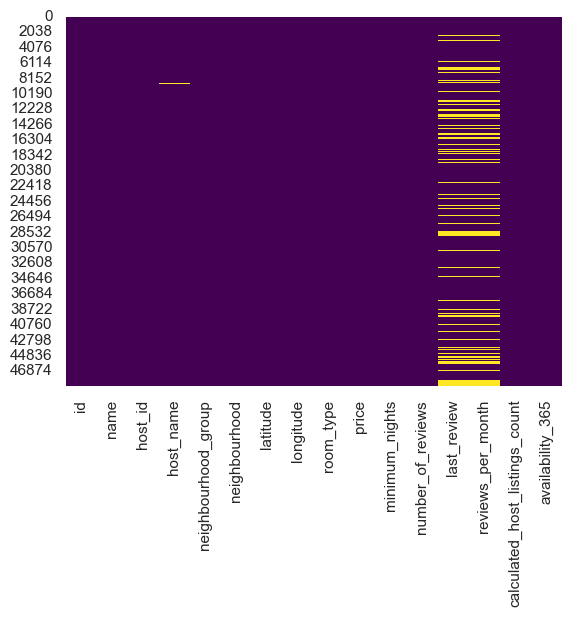

In [23]:
# Visualising the Missing values
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [24]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

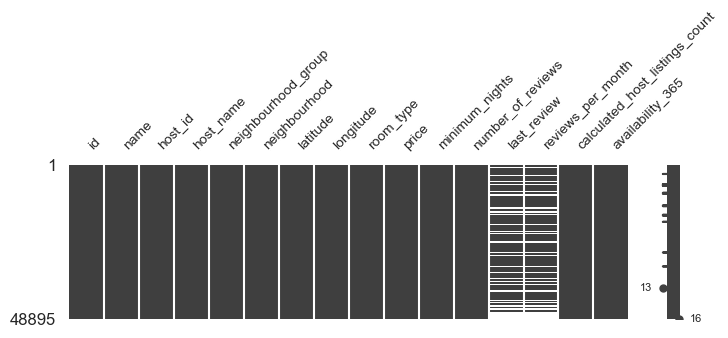

In [25]:
#Missing values 
import missingno as msno
msno.matrix(data,figsize=(8,2),fontsize=10)

In [26]:
# Drop rows with missing values in 'name' and 'host_name'
data_cleaned = data.dropna(subset=['name', 'host_name'])
data_cleaned


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [27]:
# Fill missing values in 'reviews_per_month' with 0
data_cleaned.loc[:, 'reviews_per_month'] = data_cleaned['reviews_per_month'].fillna(0)
data_cleaned.loc[:, 'reviews_per_month'] 

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48858, dtype: float64

In [28]:
# Fill missing values in 'last_review' with a placeholder date and convert to datetime
data_cleaned.loc[:, 'last_review'] = data_cleaned['last_review'].fillna('1900-01-01')
data_cleaned['last_review'] = pd.to_datetime(data_cleaned['last_review'])

# Verify changes
print(data_cleaned.isnull().sum())
print(data_cleaned.dtypes)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type          

C:\Users\loges\AppData\Local\Temp\ipykernel_10072\1833739659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['last_review'] = pd.to_datetime(data_cleaned['last_review'])


In [30]:
data_cleaned.shape

(48858, 16)

In [31]:
#Descriptive statistics
summary_stats_cleaned = data_cleaned.describe()
print(summary_stats_cleaned)

                 id       host_id      latitude     longitude         price  \
count  4.885800e+04  4.885800e+04  48858.000000  48858.000000  48858.000000   
mean   1.902335e+07  6.763169e+07     40.728941    -73.952170    152.740309   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.475980e+06  7.818669e+06     40.690090    -73.983070     69.000000   
50%    1.969114e+07  3.079133e+07     40.723070    -73.955680    106.000000   
75%    2.915765e+07  1.074344e+08     40.763107    -73.936280    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   
std    1.098289e+07  7.862389e+07      0.054528      0.046159    240.232386   

       minimum_nights  number_of_reviews                    last_review  \
count    48858.000000       48858.000000                          48858   
mean         7.012444          23.273098  1994-05-12 15:05:37.320397952   
min          1.000000           0.000000            1900-01-01 

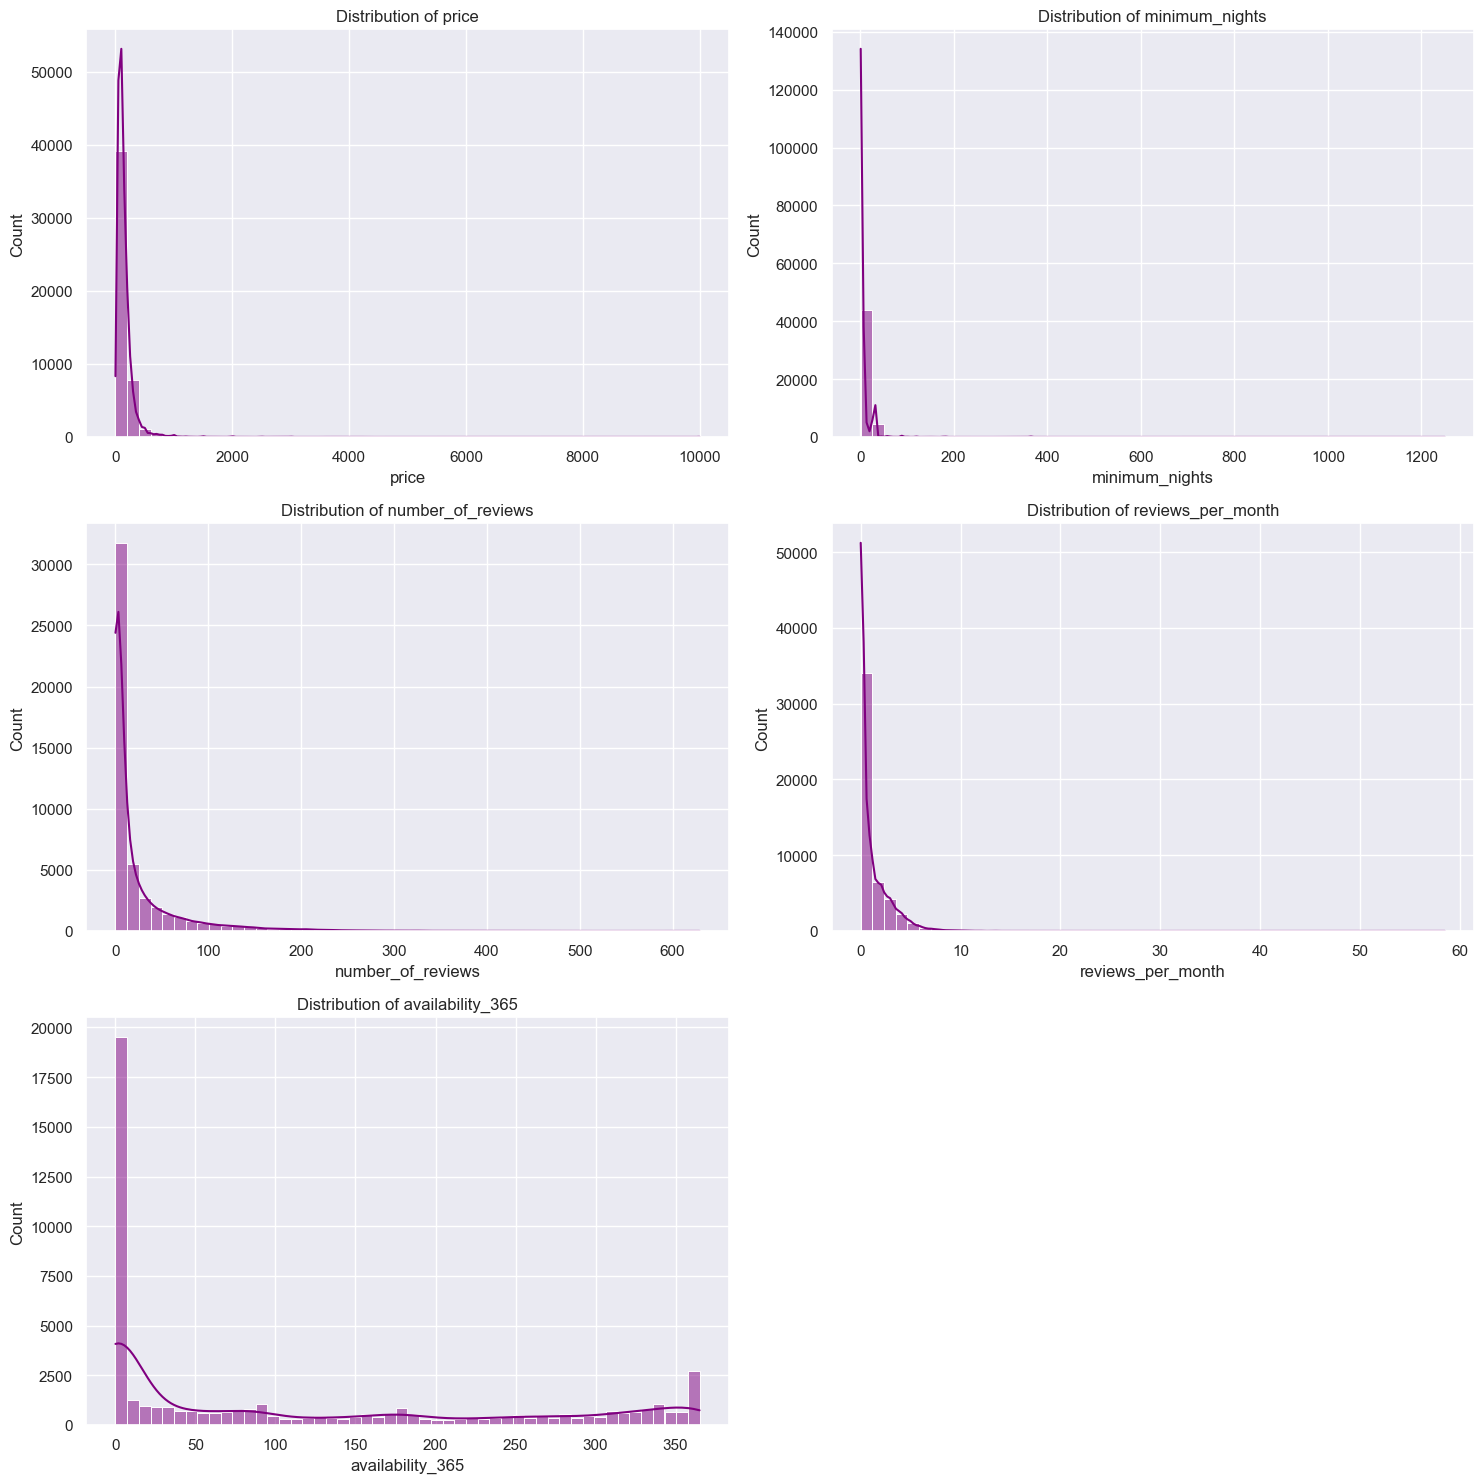

In [32]:
#Histograms for numerical variables
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()
for idx, col in enumerate(numerical_columns):
 sns.histplot(data_cleaned[col], bins=50, color='purple',kde=True, ax=axes[idx])
 axes[idx].set_title(f'Distribution of {col}')

# Remove the empty subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

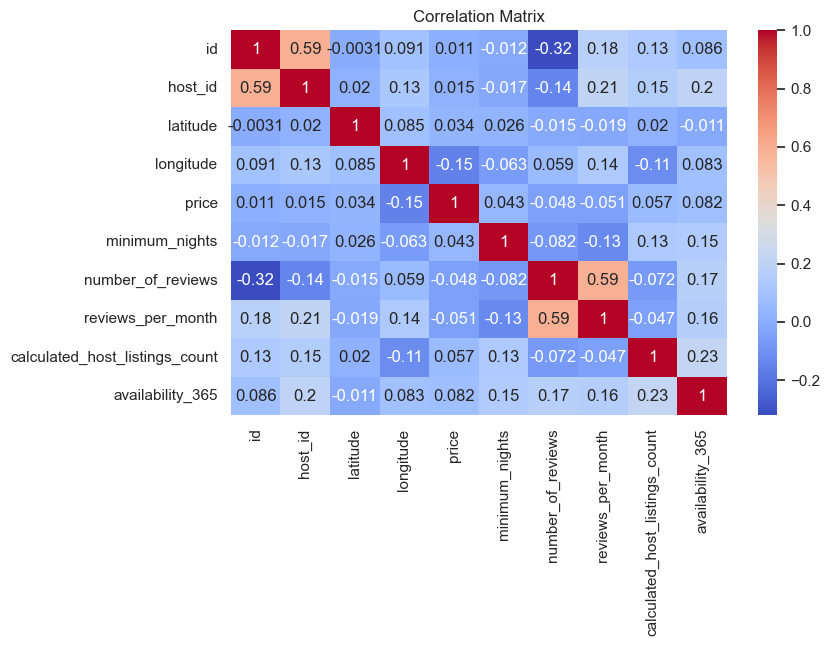

In [33]:
import numpy as np
# Filter out numeric columns for correlation matrix
numeric_cols = data_cleaned.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


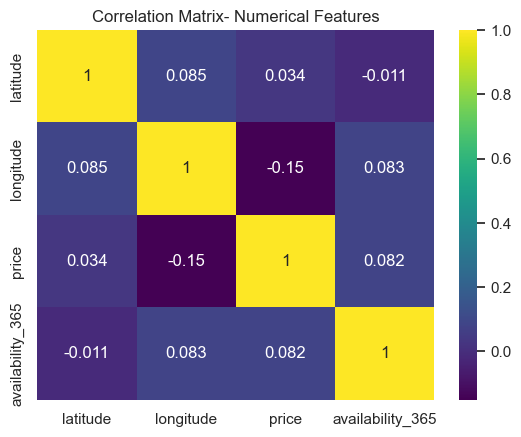

In [34]:
import pandas as pd
import seaborn as sns
import sys
sys.executable

#Numerical Features
numerical_features = ['latitude','longitude','price','availability_365']
data_filtered=data[numerical_features]

#Correlation Analysis
correlation_matrix = data_filtered.corr()
data_filtered.corr()

#HeatMap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix- Numerical Features")
plt.show()


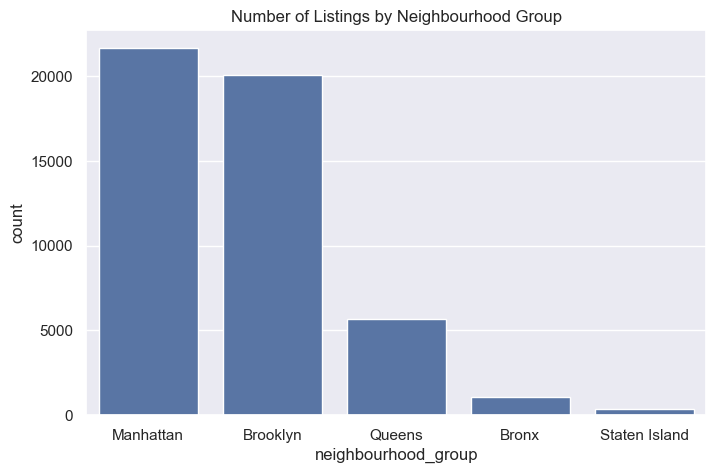

In [35]:
# Analysis of categorical variables
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='neighbourhood_group', order=data_cleaned['neighbourhood_group'].value_counts().index)
plt.title('Number of Listings by Neighbourhood Group')
plt.show()

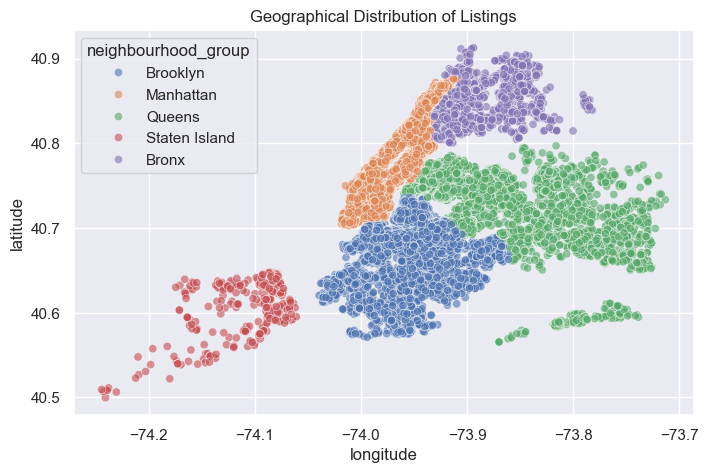

In [36]:
# Geographical analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_cleaned, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.6)
plt.title('Geographical Distribution of Listings')
plt.show()

C:\Users\loges\AppData\Local\Temp\ipykernel_10072\2814450935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['last_review'] = pd.to_datetime(data_cleaned['last_review'], errors='coerce')
C:\Users\loges\AppData\Local\Temp\ipykernel_10072\2814450935.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['last_review_month'] = data_cleaned['last_review'].dt.month


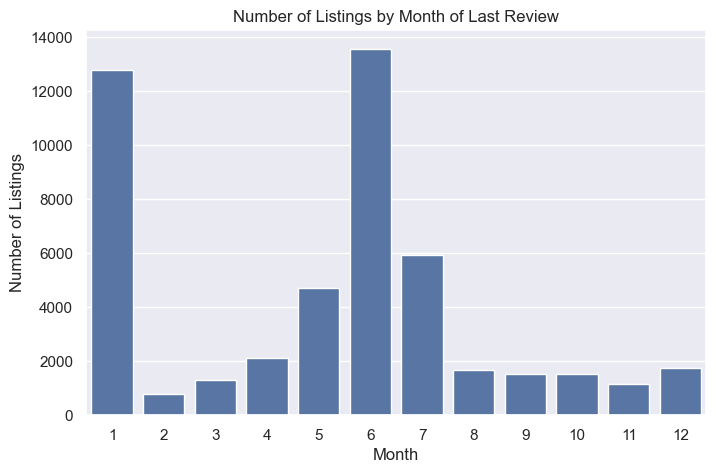

In [37]:
#Count Plots for Temporal Analysis

# Convert 'last_review' to datetime if not already converted
data_cleaned['last_review'] = pd.to_datetime(data_cleaned['last_review'], errors='coerce')


# Distribution of listings by month of the last review
data_cleaned['last_review_month'] = data_cleaned['last_review'].dt.month
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='last_review_month', order=range(1, 13))
plt.title('Number of Listings by Month of Last Review')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.show()

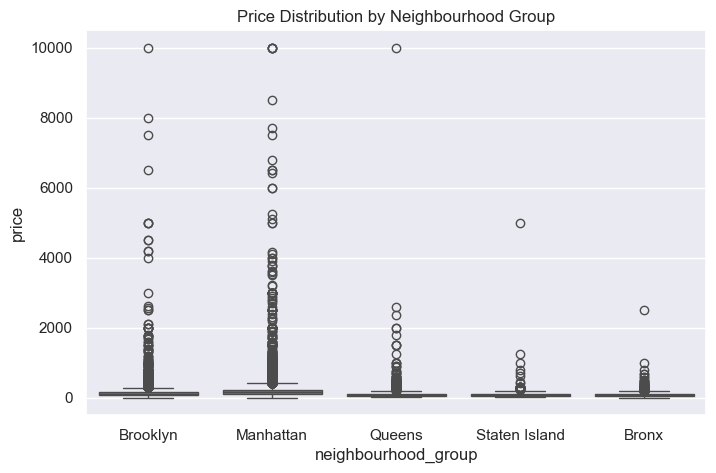

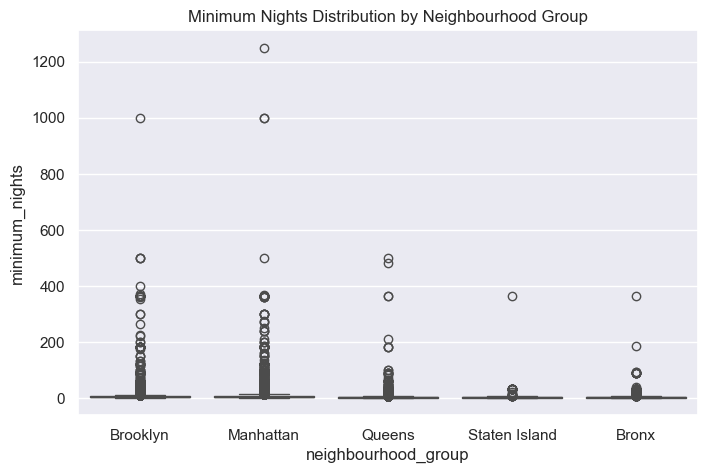

In [38]:
# Box plots for numerical variables by neighbourhood_group

plt.figure(figsize=(8, 5))
sns.boxplot(data=data_cleaned, x='neighbourhood_group', y='price')
plt.title('Price Distribution by Neighbourhood Group')
plt.show()
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_cleaned, x='neighbourhood_group', y='minimum_nights')
plt.title('Minimum Nights Distribution by Neighbourhood Group')
plt.show()

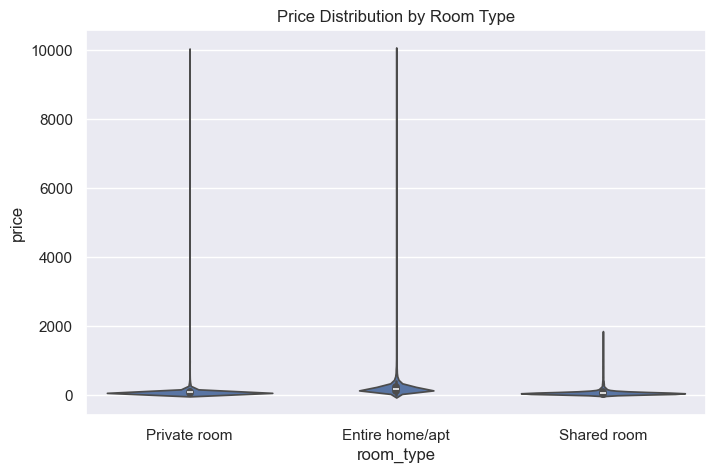

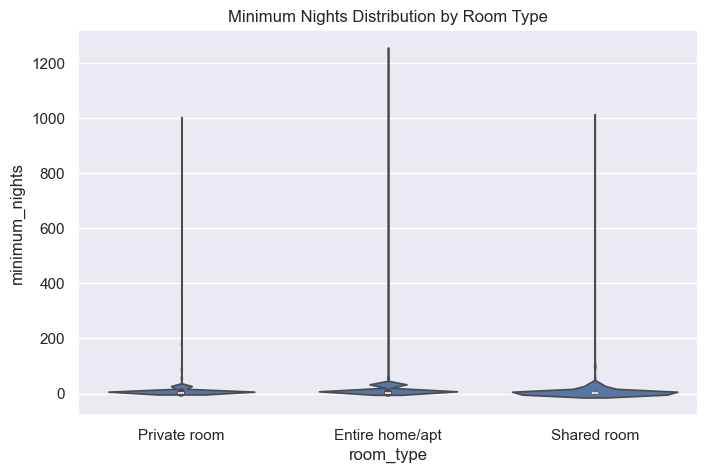

In [39]:
# Violin plots for numerical variables by room_type
plt.figure(figsize=(8, 5))
sns.violinplot(data=data_cleaned, x='room_type', y='price')
plt.title('Price Distribution by Room Type')
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=data_cleaned, x='room_type', y='minimum_nights')
plt.title('Minimum Nights Distribution by Room Type')
plt.show()

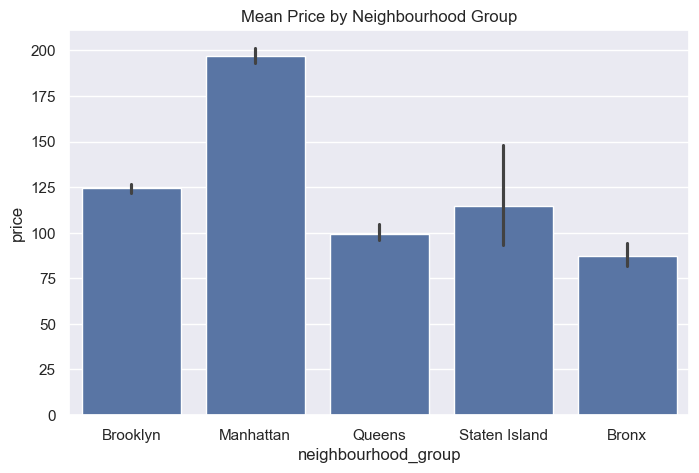

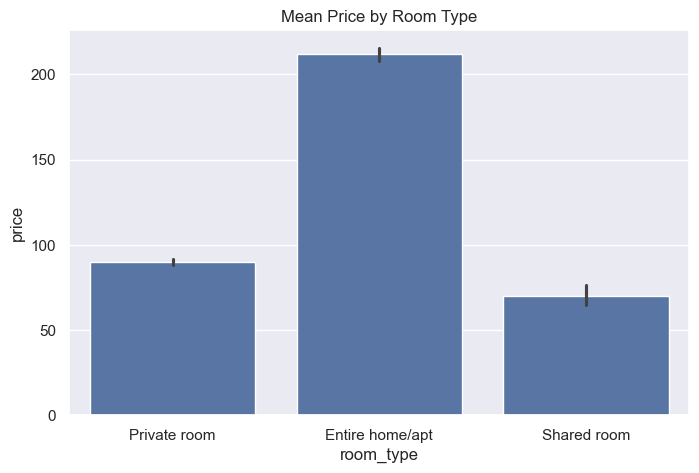

In [41]:
# Mean price by neighbourhood group
plt.figure(figsize=(8, 5))
sns.barplot(data=data_cleaned, x='neighbourhood_group', y='price', estimator=np.mean)
plt.title('Mean Price by Neighbourhood Group')
plt.show()

# Mean price by room type
plt.figure(figsize=(8, 5))
sns.barplot(data=data_cleaned, x='room_type', y='price', estimator=np.mean)
plt.title('Mean Price by Room Type')
plt.show()

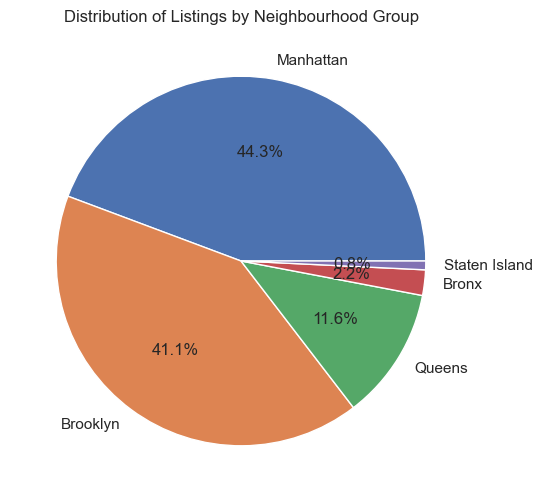

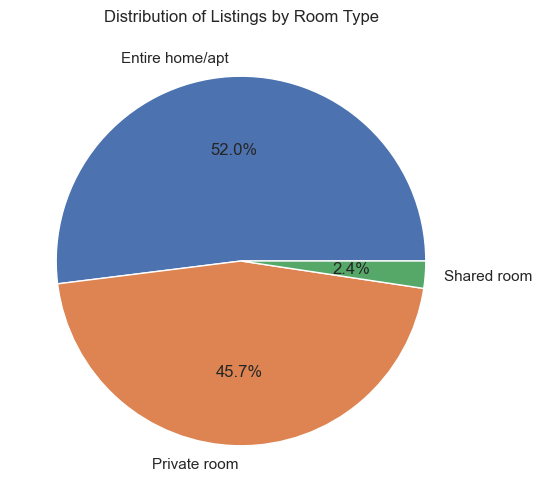

In [42]:
# Pie chart for neighbourhood_group
plt.figure(figsize=(6, 6))
data_cleaned['neighbourhood_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Listings by Neighbourhood Group')
plt.ylabel('')
plt.show()

# Pie chart for room_type
plt.figure(figsize=(6, 6))
data_cleaned['room_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Listings by Room Type')
plt.ylabel('')
plt.show()


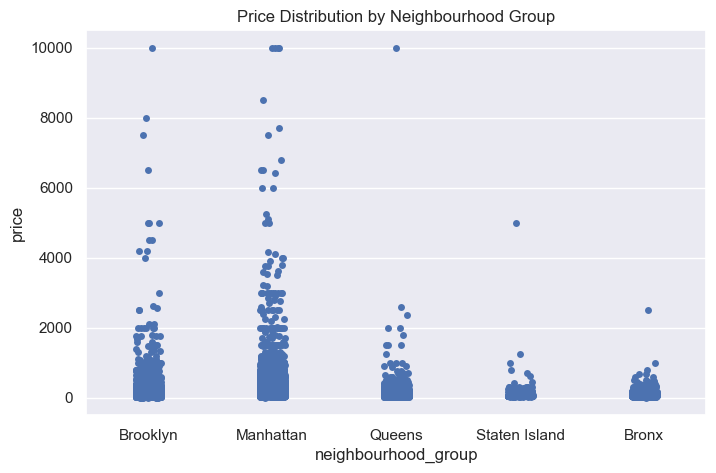

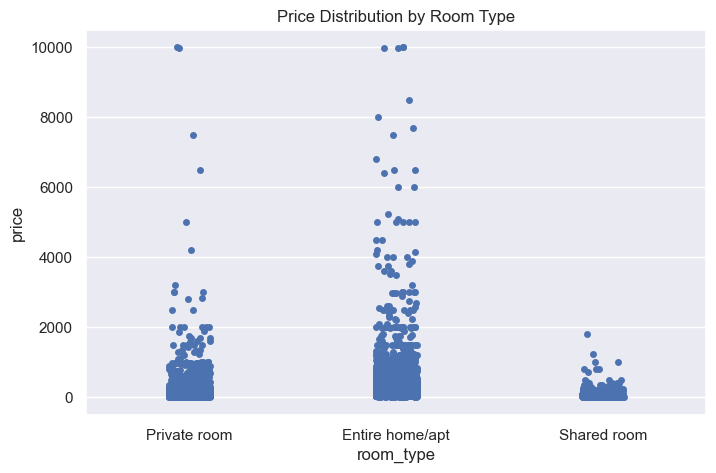

In [43]:
# Strip plot for price by neighbourhood group
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_cleaned, x='neighbourhood_group', y='price', jitter=True)
plt.title('Price Distribution by Neighbourhood Group')
plt.show()

# Strip plot for price by room type
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_cleaned, x='room_type', y='price', jitter=True)
plt.title('Price Distribution by Room Type')
plt.show()

C:\Users\loges\AppData\Local\Temp\ipykernel_10072\4205160393.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_cleaned, x='price', hue='room_type', shade=True)


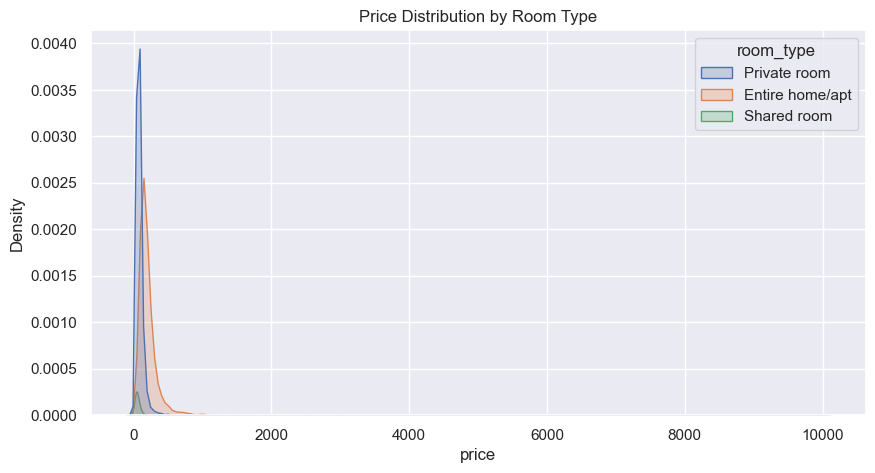

C:\Users\loges\AppData\Local\Temp\ipykernel_10072\4205160393.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_cleaned, x='price', hue='neighbourhood_group', shade=True)


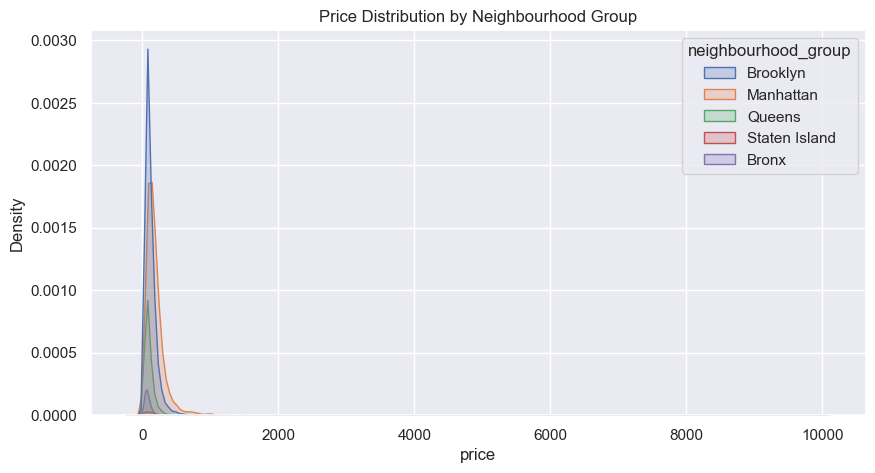

In [50]:
# KDE plot for price by room type
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data_cleaned, x='price', hue='room_type', shade=True)
plt.title('Price Distribution by Room Type')
plt.show()

# KDE plot for price by neighbourhood group
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data_cleaned, x='price', hue='neighbourhood_group', shade=True)
plt.title('Price Distribution by Neighbourhood Group')
plt.show()